<a href="https://colab.research.google.com/github/kasnk/machine_Learning/blob/main/Practical_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: install xgboost random forest adaboost gradientboost

!pip install xgboost
!pip install scikit-learn


In [2]:
#Data Load
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

df = pd.read_csv('diabetes.csv')
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
#Preprocessing

print(df.isnull().sum())

df.fillna(df.mean(), inplace=True)

print(df.dtypes)


X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [4]:
# Bagging using random forest algorithm to predict diabetes risk

from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

# Evaluate
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")


Random Forest Accuracy: 0.7207792207792207


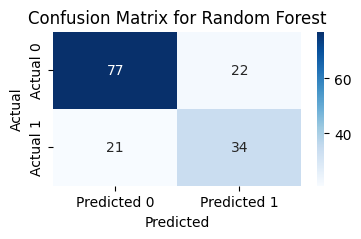

In [10]:
#confusion matrix for Random Forest

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()


In [5]:
# Boosting using xgboost algorithm to predict diabetes risk

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)

#Evaluate XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")


XGBoost Accuracy: 0.7077922077922078


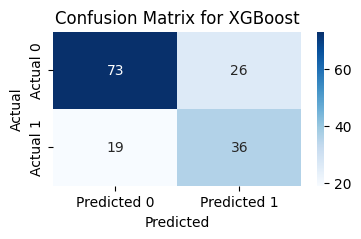

In [11]:
#confusion matrix for XGBoost

cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(4, 2))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost')
plt.show()


In [6]:
# Boosting using adaboost algorithm to predict diabetes risk

from sklearn.ensemble import AdaBoostClassifier

ada_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_classifier.fit(X_train, y_train)
y_pred_ada = ada_classifier.predict(X_test)

# Evaluate AdaBoost
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost Accuracy: {accuracy_ada}")


AdaBoost Accuracy: 0.7402597402597403


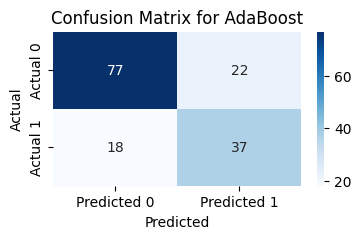

In [13]:

#confusion matrix for AdaBoost

cm_ada = confusion_matrix(y_test, y_pred_ada)

plt.figure(figsize=(4, 2))
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for AdaBoost')
plt.show()


In [7]:
#Gradientboost algorithm to predict diabetes risk

from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate GradientBoosting
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb}")


Gradient Boosting Accuracy: 0.7467532467532467


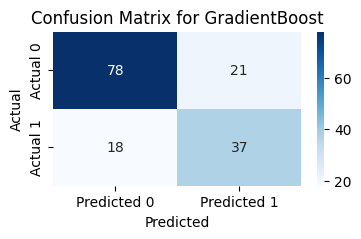

In [14]:

#confusion matrix for GradientBoost

cm_gb = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(4, 2))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for GradientBoost')
plt.show()


In [15]:
# all used algorithm accuracy

print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"XGBoost Accuracy: {accuracy_xgb}")
print(f"AdaBoost Accuracy: {accuracy_ada}")
print(f"Gradient Boosting Accuracy: {accuracy_gb}")


Random Forest Accuracy: 0.7207792207792207
XGBoost Accuracy: 0.7077922077922078
AdaBoost Accuracy: 0.7402597402597403
Gradient Boosting Accuracy: 0.7467532467532467


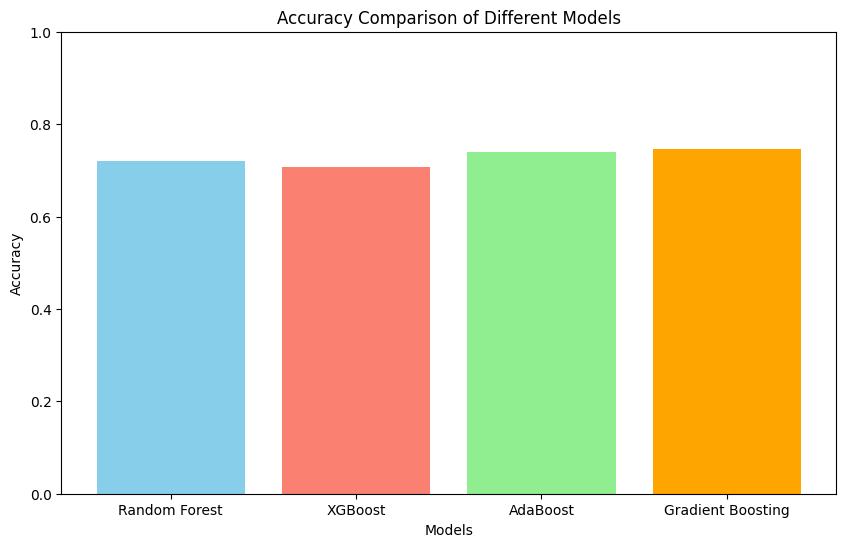

In [17]:
# drawing a bar plot of accuracy

import matplotlib.pyplot as plt


accuracy_scores = {
    'Random Forest': accuracy_rf,
    'XGBoost': accuracy_xgb,
    'AdaBoost': accuracy_ada,
    'Gradient Boosting': accuracy_gb
}

models = list(accuracy_scores.keys())
accuracy_values = list(accuracy_scores.values())

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_values, color=['skyblue', 'salmon', 'lightgreen', 'orange'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Different Models")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
plt.show()
